In [2]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import islice
from collections import defaultdict
from DataPreparation import *

img_dir = 'Datasets/Chestxray/Test_images'

## Skip-connections

In [ ]:
output_dir = 'Datasets/Chestxray/Output_Skip'

noise_skip = process_and_store_sigma('noise', img_dir, output_dir)
gblur_skip = process_and_store_sigma('blurring/gaussian', img_dir, output_dir)
mblur_skip = process_and_store_sigma('blurring/median', img_dir, output_dir)
morphing_skip = process_and_store_sigma('morphing', img_dir, output_dir)

# Plot results
gblur_skip_subset = dict(islice(gblur_skip.items(), 9))
fig, ax = plot_sigmas_mean(gblur_skip_subset)

  0%|          | 0/132 [00:00<?, ?it/s]

  2%|▏         | 3/132 [00:06<04:35,  2.13s/it]

### Gaussian noise

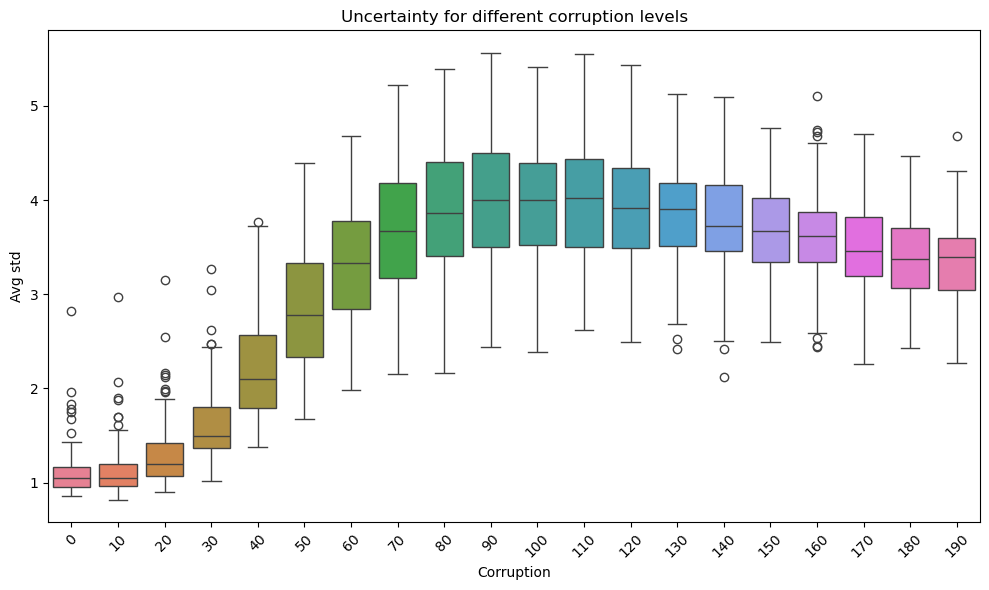

In [44]:
sigmas_global = defaultdict(list)

for val in noise_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

plot_global_uncertainty(sigmas_global, title='Uncertainty for different corruption levels')
plt.show()

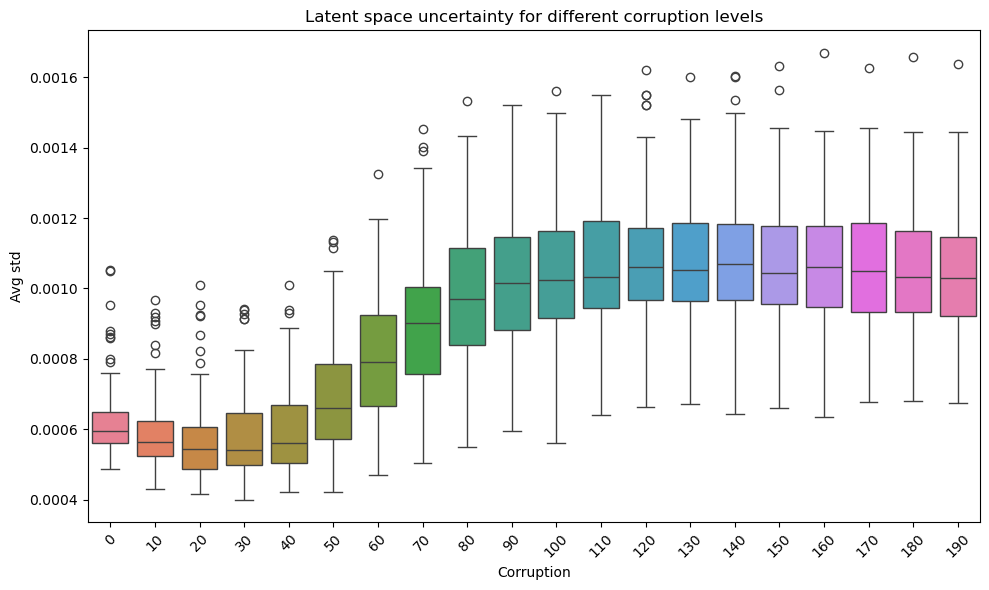

In [43]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_noise_skip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

plot_global_uncertainty(sigmas_global, title='Latent space uncertainty for different corruption levels')
plt.show()

### Gaussian blur

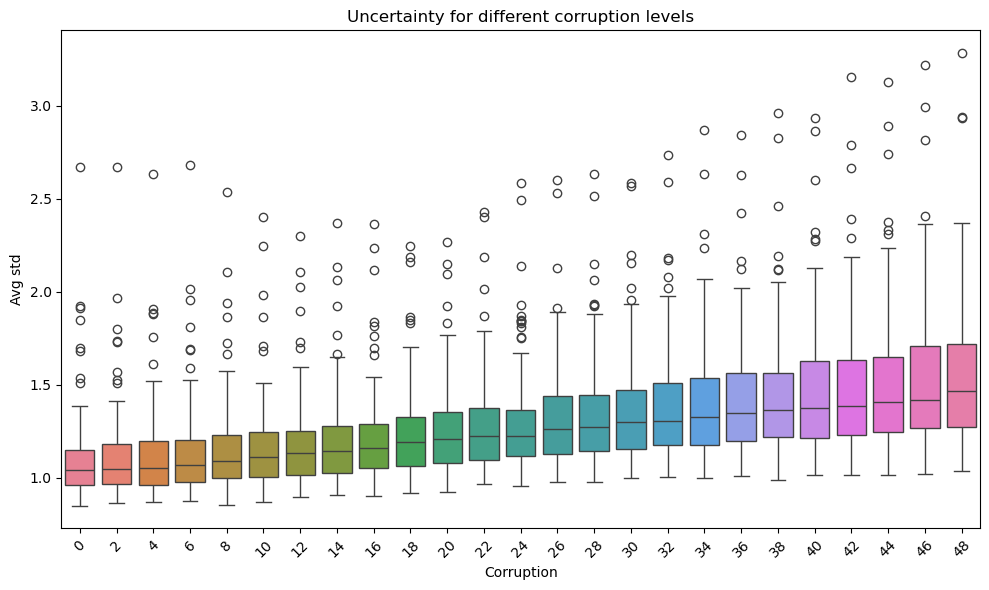

In [42]:
sigmas_global = defaultdict(list)

for val in gblur_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

plot_global_uncertainty(sigmas_global, title='Uncertainty for different corruption levels')
plt.show()

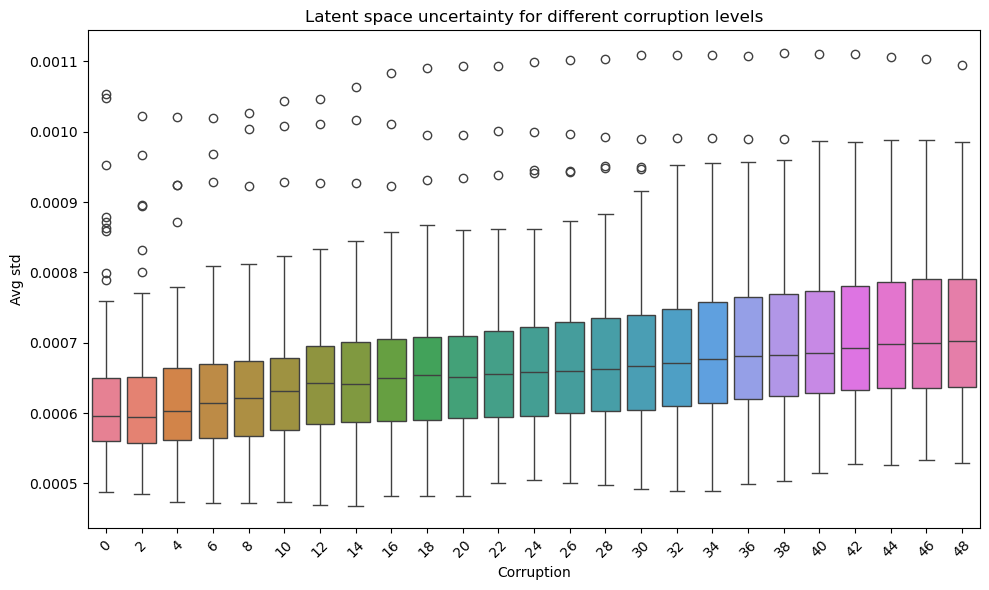

In [41]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_gaussianblur_skip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

plot_global_uncertainty(sigmas_global, title='Latent space uncertainty for different corruption levels')
plt.show()

### Median blur

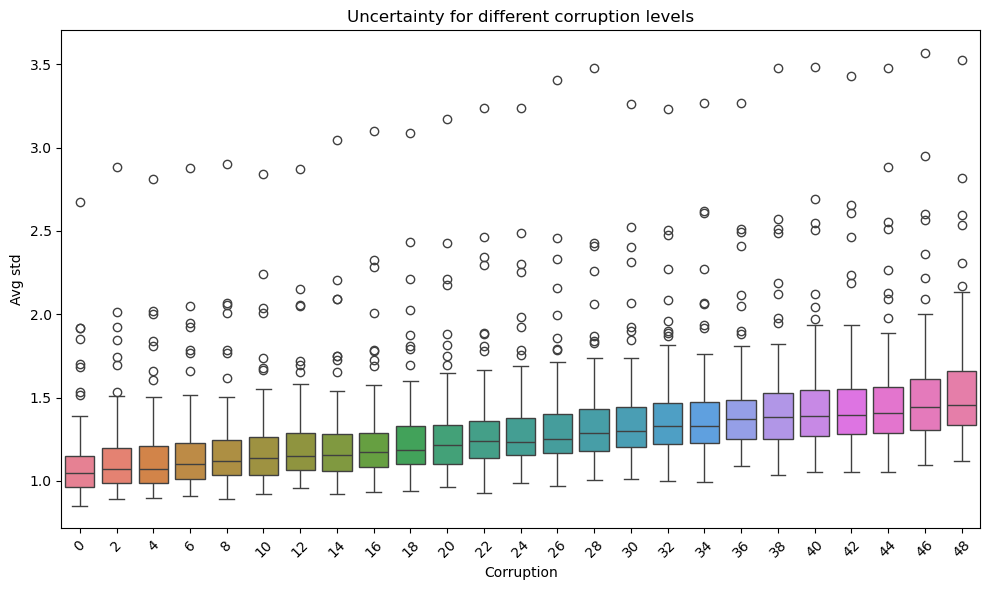

In [39]:
sigmas_global = defaultdict(list)

for val in mblur_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

plot_global_uncertainty(sigmas_global, title='Uncertainty for different corruption levels')
plt.show()

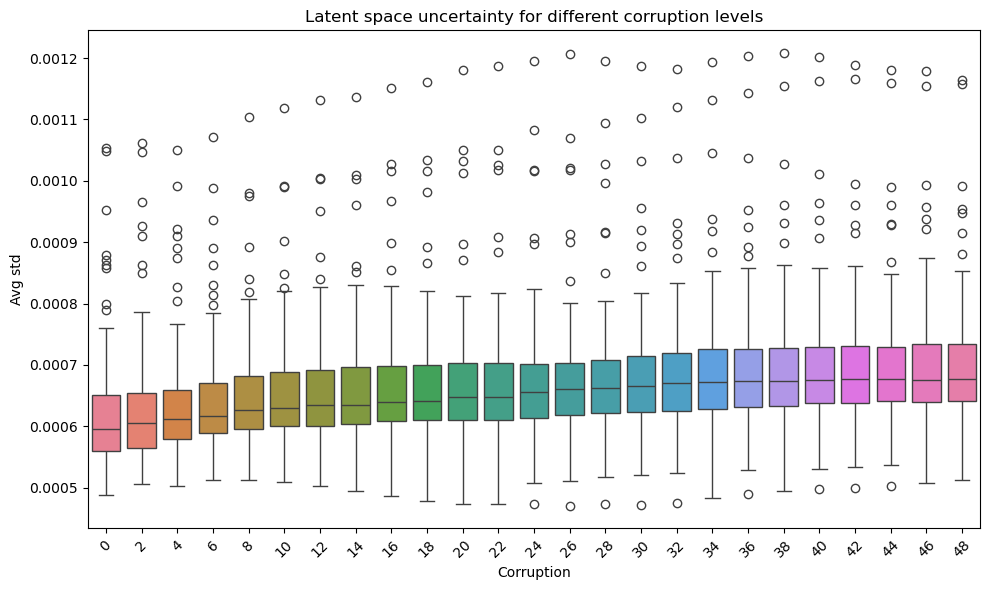

In [40]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_medianblur_skip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

plot_global_uncertainty(sigmas_global, title='Latent space uncertainty for different corruption levels')
plt.show()

### Image morphing

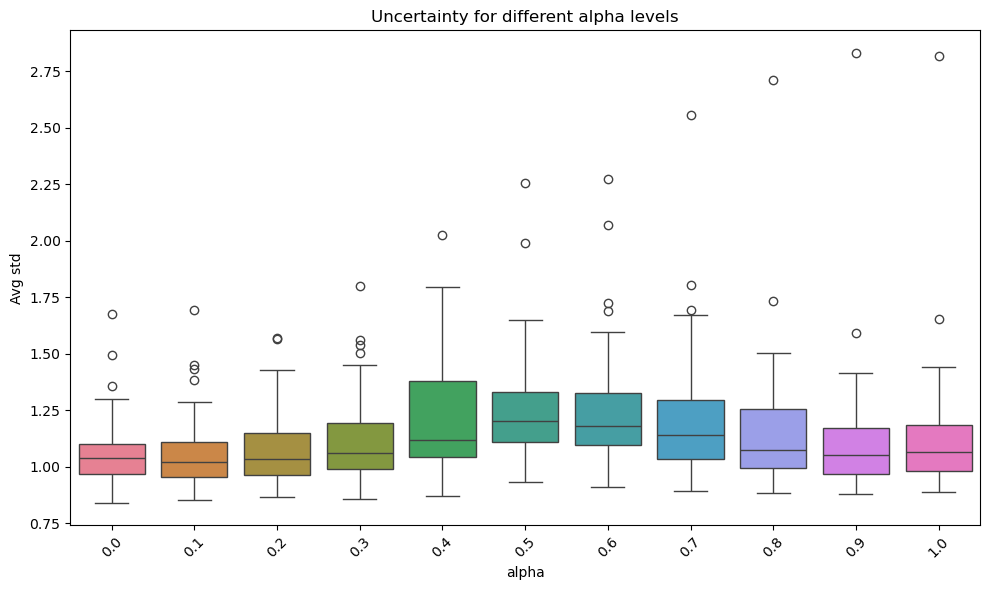

In [49]:
sigmas_global = defaultdict(list)

for val in morphing_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

keys = np.round(np.arange(0, 1.1, 0.1), 2)
sigmas_global = dict(zip(keys, sigmas_global.values()))
fig, ax = plot_global_uncertainty(sigmas_global, title='Uncertainty for different alpha levels')
ax.set_xlabel('alpha')
plt.show()

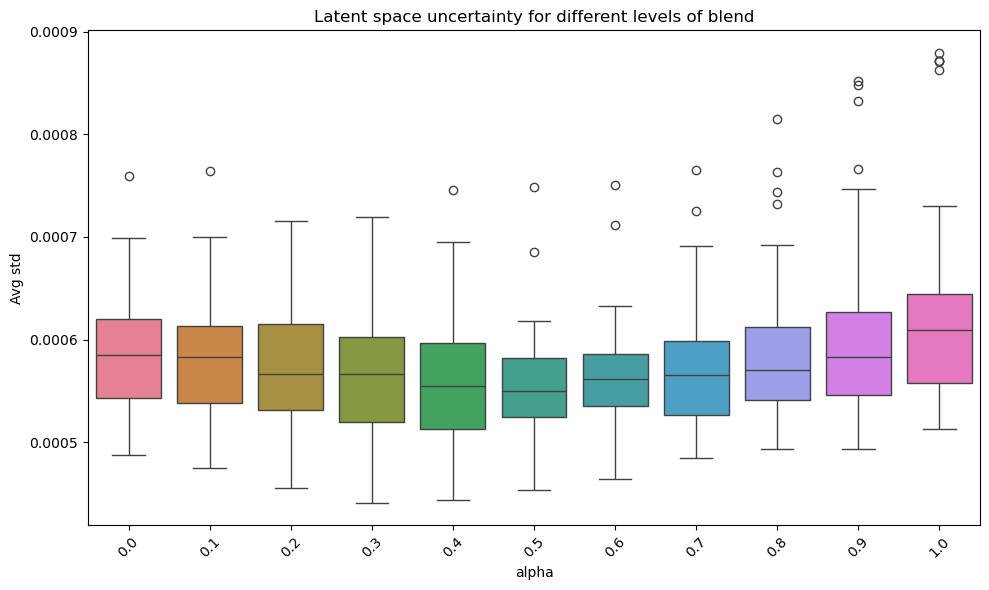

In [38]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_blend_skip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

keys = np.round(np.arange(0, 1.1, 0.1), 2)
sigmas_global = dict(zip(keys, sigmas_global.values()))
fig, ax = plot_global_uncertainty(sigmas_global, title='Latent space uncertainty for different levels of blend')
ax.set_xlabel('alpha')
plt.show()

### Error

Text(0.9789304634814607, 61.58924098053114, 'Corr: 0.55')

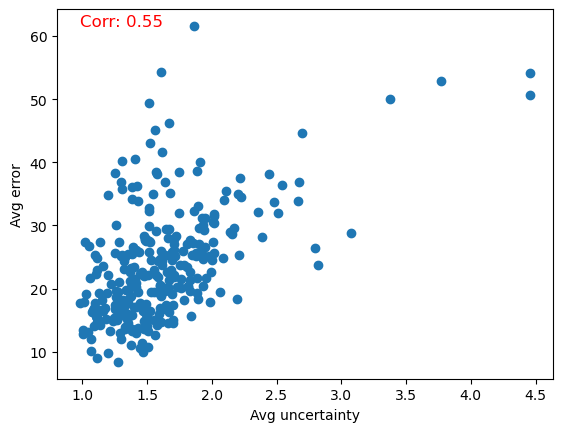

In [11]:
img_dir_OCC = os.path.join(img_dir, 'Corrupted', 'occlusion')
output_dir_OCC = os.path.join(output_dir, 'Corrupted', 'occlusion')
files = os.listdir(img_dir_OCC)

mean_errors, mean_sigmas  = [], []        
node_err, node_sigmas = [], []

# Single loop over files
for file in files:
    error, sigma = get_error(img_dir_OCC, output_dir_OCC, file)
    
    # Store means 
    mean_errors.append(error.mean())
    mean_sigmas.append(sigma.mean())
    
    # Store errors per node
    node_err.extend(error)
    node_sigmas.extend(sigma)

correlation = np.corrcoef(mean_sigmas, mean_errors)[0, 1]

plt.scatter(mean_sigmas, mean_errors)
plt.xlabel('Avg uncertainty')
plt.ylabel('Avg error')
plt.text(min(mean_sigmas), max(mean_errors), f'Corr: {correlation:.2f}', fontsize=12, color='red')

## No skip-connections

In [12]:
output_dir = 'Datasets/Chestxray/Output_NoSkip'

noise_noskip = process_and_store_sigma('noise', img_dir, output_dir)
gblur_noskip = process_and_store_sigma('blurring/gaussian', img_dir, output_dir)
mblur_noskip = process_and_store_sigma('blurring/median', img_dir, output_dir)
morphing_noskip = process_and_store_sigma('morphing', img_dir, output_dir)

# Plot results
gblur_noskip_subset = dict(islice(gblur_noskip.items(), 9))

100%|██████████| 50/50 [00:18<00:00,  2.75it/s]


### Gaussian noise

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Uncertainty for different corruption levels'}, xlabel='Corruption', ylabel='Avg std'>)

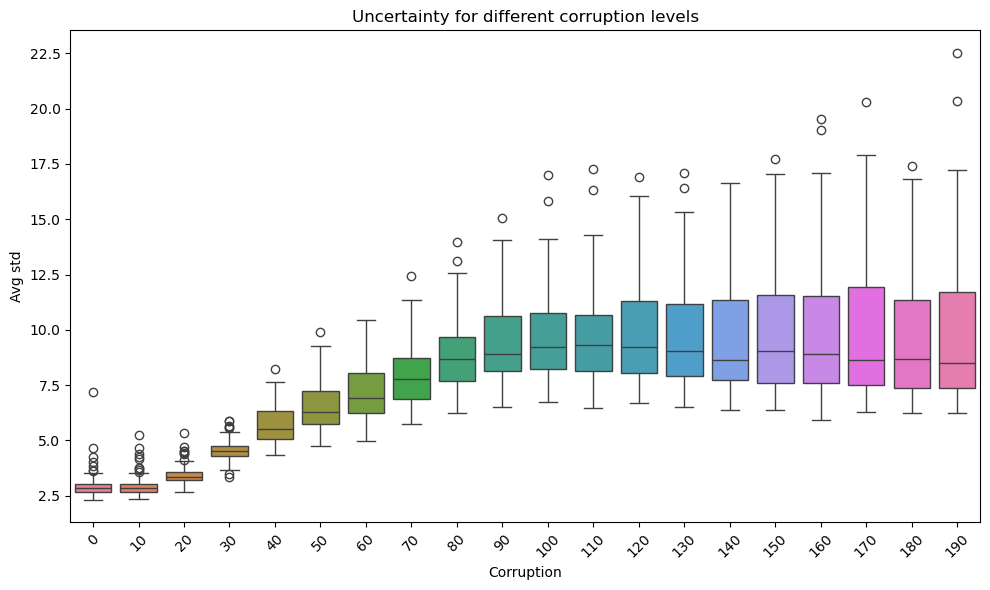

In [ ]:
sigmas_global = defaultdict(list)

for val in noise_noskip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

fig, ax = plot_global_uncertainty(sigmas_global, title='Uncertainty for different corruption levels')

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Latent space uncertainty for different corruption levels'}, xlabel='Corruption', ylabel='Avg std'>)

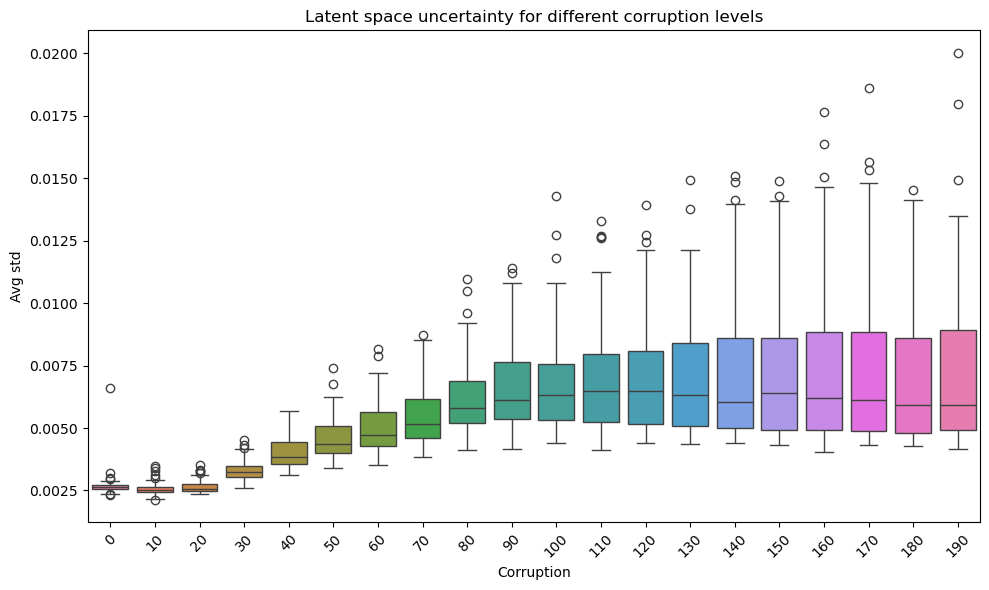

In [ ]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_noise_noskip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

fig, ax = plot_global_uncertainty(sigmas_global, title='Latent space uncertainty for different corruption levels')

### Gaussian blur

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Uncertainty for different corruption levels'}, xlabel='Corruption', ylabel='Avg std'>)

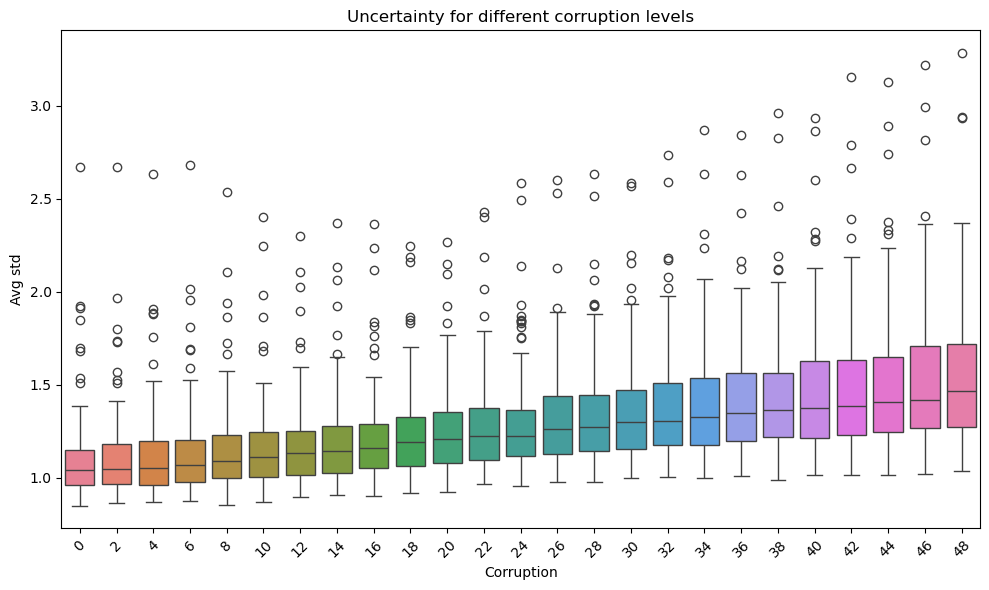

In [ ]:
sigmas_global = defaultdict(list)

for val in gblur_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

fig, ax = plot_global_uncertainty(sigmas_global, title='Uncertainty for different corruption levels')

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Latent space uncertainty for different corruption levels'}, xlabel='Corruption', ylabel='Avg std'>)

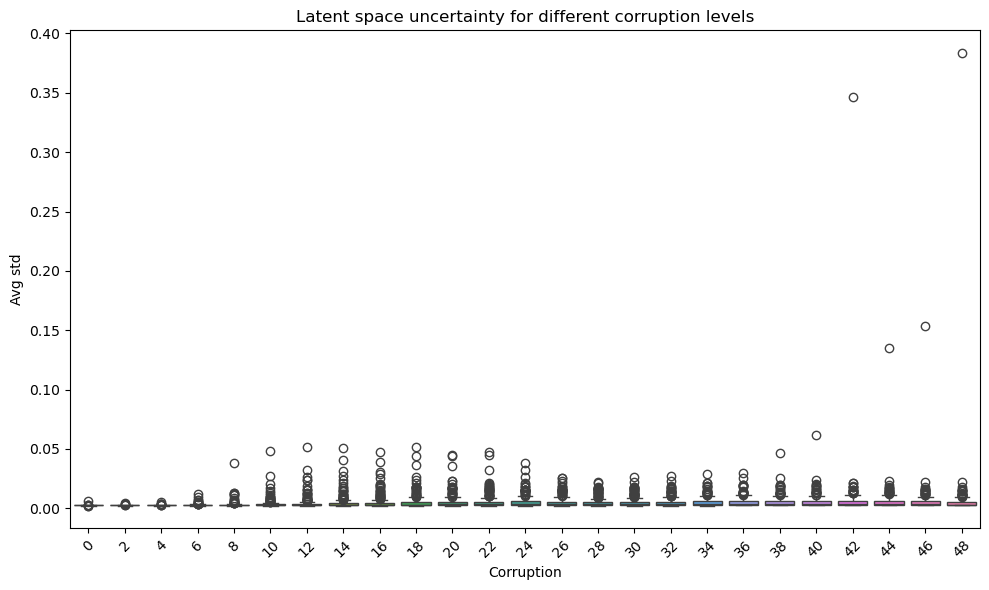

In [ ]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_gaussianblur_noskip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

fig, ax = plot_global_uncertainty(sigmas_global, title='Latent space uncertainty for different corruption levels')

### Median blur

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Uncertainty for different corruption levels'}, xlabel='Corruption', ylabel='Avg std'>)

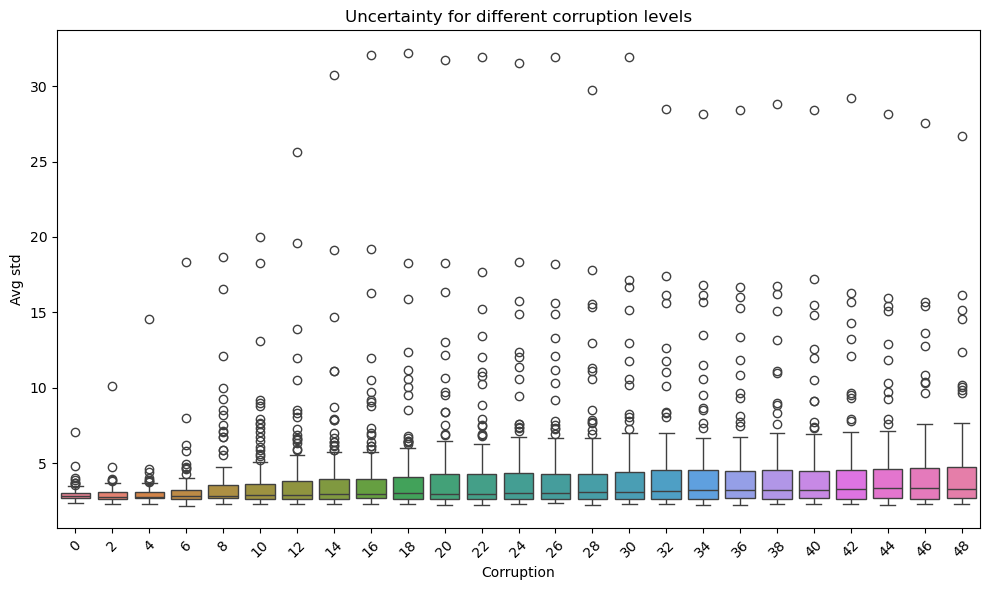

In [17]:
sigmas_global = defaultdict(list)

for val in mblur_noskip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

plot_global_uncertainty(sigmas_global, title='Uncertainty for different corruption levels')

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Latent space uncertainty for different corruption levels'}, xlabel='Corruption', ylabel='Avg std'>)

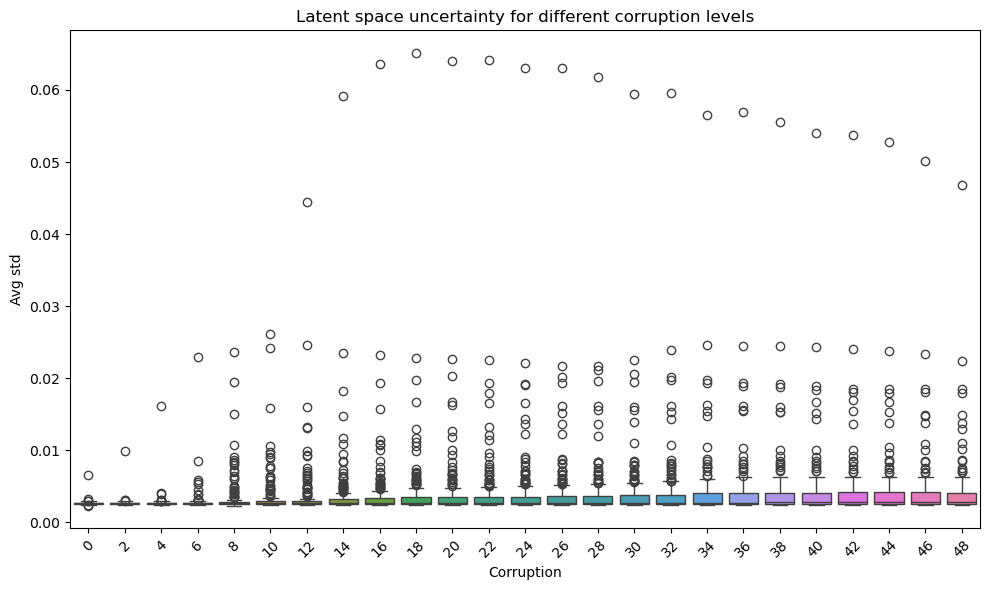

In [18]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_medianblur_noskip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

plot_global_uncertainty(sigmas_global, title='Latent space uncertainty for different corruption levels')

### Image morphing

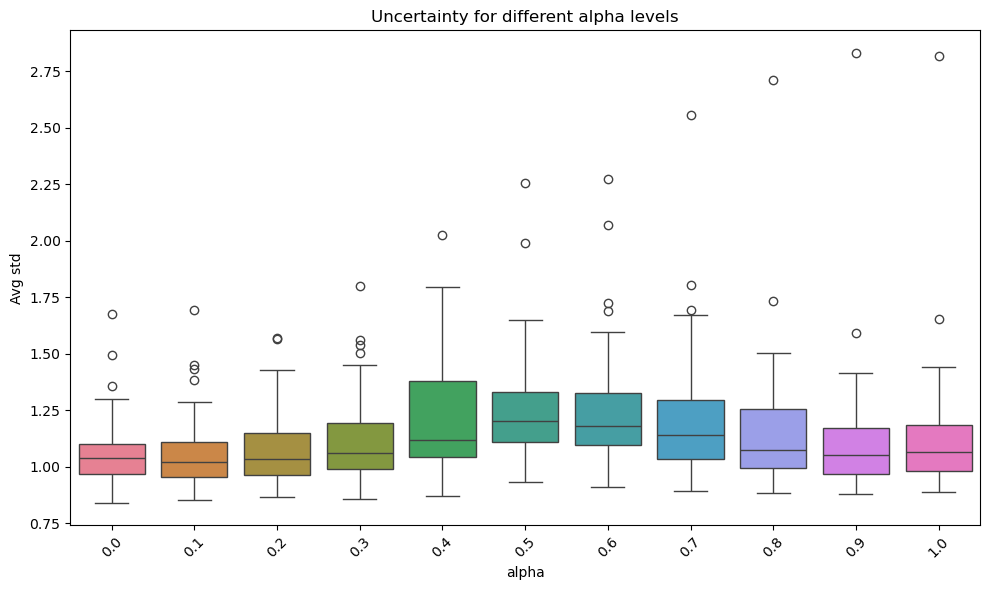

In [50]:
sigmas_global = defaultdict(list)

for val in morphing_skip.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

keys = np.round(np.arange(0, 1.1, 0.1), 2)
sigmas_global = dict(zip(keys, sigmas_global.values()))
fig, ax = plot_global_uncertainty(sigmas_global, title='Uncertainty for different alpha levels')
ax.set_xlabel('alpha')
plt.show()

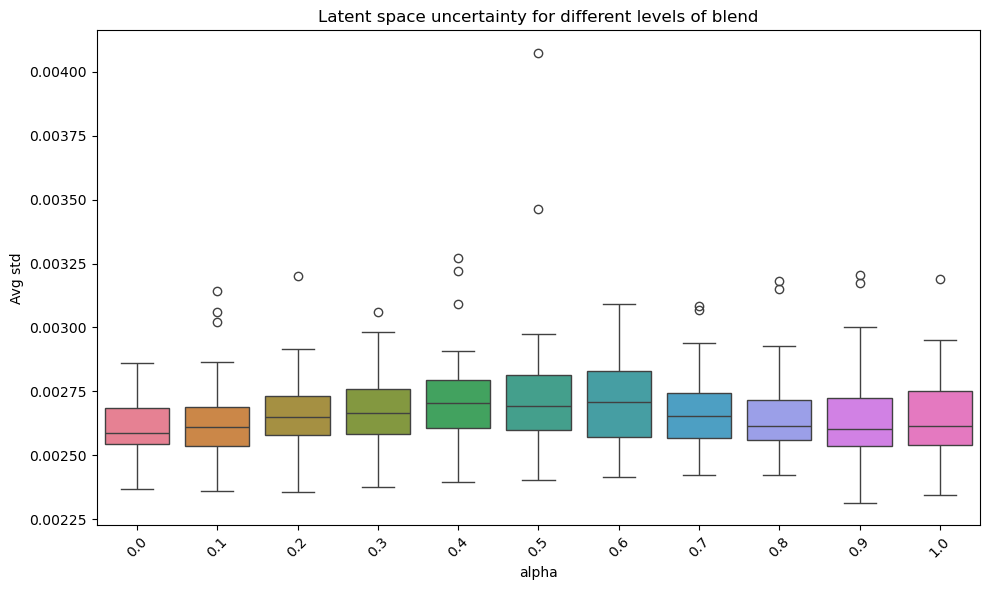

In [37]:
sigmas_global = defaultdict(list)

file_path = 'Datasets/Chestxray/sigmas_blend_noskip.txt'
latent_sigmas= read_sigma_file(file_path)

for val in latent_sigmas.values():
    for sigma, corr_level in zip(val['sigmas'], val['corr_levels']):
        sigmas_global[corr_level].append(sigma.mean())

keys = np.round(np.arange(0, 1.1, 0.1), 2)
sigmas_global = dict(zip(keys, sigmas_global.values()))
fig, ax = plot_global_uncertainty(sigmas_global, title='Latent space uncertainty for different levels of blend')
ax.set_xlabel('alpha')
plt.show()

### Error

Text(2.4908572945601315, 135.14829582571016, 'Corr: 0.74')

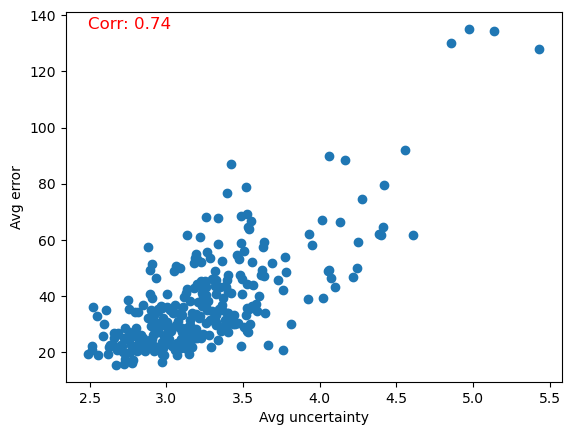

In [20]:
img_dir_OCC = os.path.join(img_dir, 'Corrupted', 'occlusion')
output_dir_OCC = os.path.join(output_dir, 'Corrupted', 'occlusion')
files = os.listdir(img_dir_OCC)

mean_errors, mean_sigmas  = [], []        
node_err, node_sigmas = [], []

# Single loop over files
for file in files:
    error, sigma = get_error(img_dir_OCC, output_dir_OCC, file)
    
    # Store means 
    mean_errors.append(error.mean())
    mean_sigmas.append(sigma.mean())
    
    # Store errors per node
    node_err.extend(error)
    node_sigmas.extend(sigma)

correlation = np.corrcoef(mean_sigmas, mean_errors)[0, 1]

plt.scatter(mean_sigmas, mean_errors)
plt.xlabel('Avg uncertainty')
plt.ylabel('Avg error')
plt.text(min(mean_sigmas), max(mean_errors), f'Corr: {correlation:.2f}', fontsize=12, color='red')